In [25]:
import pandas as pd
import numpy as np
import matplotlib

In [27]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
matplotlib.use('inline')
# This is to be able to show plots in notebook

In [31]:
# Create a dataframe by import the dataset using pandas
df = pd.read_csv('./datasets/BostonHousing.csv')

In [33]:
# Check the dataframe headers/columns
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
# Get the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [37]:
# Describe the data to get mean, max, min, sd, percentiles, quartiles
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
# Check if there are empty cells in the dataset
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [41]:
# Find the column references
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [51]:
# Check the distribution of target column in this case, crim
sns.displot(df['crim'])
# plot.show()

In [55]:
sns.pairplot(df)
# plot.show()

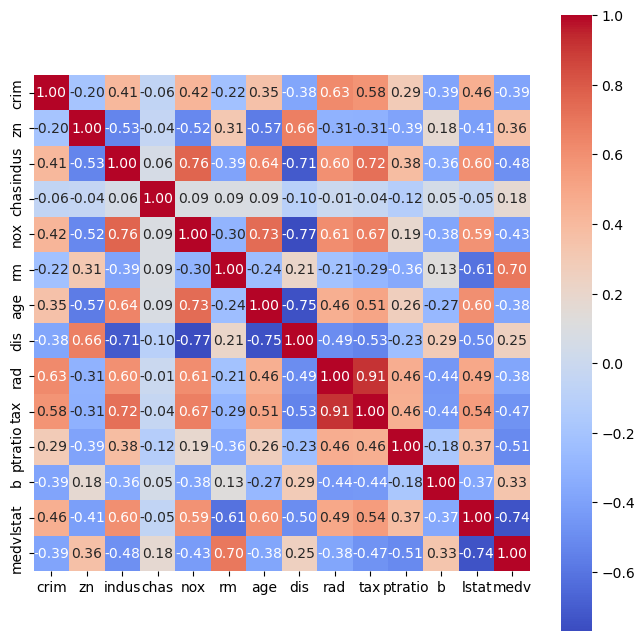

In [77]:
# Show the heatmap of the correlation matrix of the data
# df.corr()
plot.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, vmax=1,square=True,fmt=".2f",cmap="coolwarm",cbar=True)
plot.show()

In [65]:
# Using Scikitlearn to train the linear regression model

In [67]:
# Peak the columns in the data frame
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [71]:
# Make the features to be used for training the model
# X should only contain the features you will use to train the model
X = df[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv']]

In [73]:
# Create y which is your target for prediction
y = df['crim']

In [79]:
# Splitting the data into training and testing data set using scikitlearn.model_selection's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [81]:
# Creating & Training the model 
linear_model = LinearRegression()

In [83]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Check the model's coefficient
linear_model.coef_

array([ 3.88115304e-02, -6.45385792e-02, -3.75232857e-01, -6.44224026e+00,
        7.43251921e-01, -3.34464417e-03, -8.18245903e-01,  5.34025209e-01,
       -2.67119064e-03, -2.21601952e-01, -5.14904254e-03,  1.61972330e-01,
       -1.71741634e-01])

In [89]:
# Find the intercepts
print(linear_model.intercept_)

9.632843282699096


In [91]:
# Create a dataframe for the coeffients
coef_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coeff'])

In [93]:
coef_df

,Coeff
zn,0.038812
indus,-0.064539
chas,-0.375233
nox,-6.442240
rm,0.743252
age,-0.003345
dis,-0.818246
rad,0.534025
tax,-0.002671
ptratio,-0.221602


In [97]:
# Coefficient explanation
# A 1 unit increase in zn all factors constant relates to 0.038812 in crime rate

# Can use boston data from sklearn
# from sklearn.datasets import load_boston
#  boston = load_boston()
# boston.keys()
# print(boston['DESC'])
# print(boston['data'])
# print(boston['feature_names'])
# print(boston['target'])

In [99]:
# Make Predictions from your test sets
predictions = linear_model.predict(X_test) 

In [101]:
predictions

array([-7.58299119e-01, -3.82030022e+00,  1.28402660e+01,  1.12268735e+01,
        2.52027957e-01,  1.64512970e+00, -3.83060276e-01,  4.21086167e+00,
       -2.11454624e+00,  1.43500954e+01,  1.50689177e+00,  2.28087805e+00,
        6.65299682e-02, -2.21736458e+00,  2.60264726e+00,  9.02576126e+00,
        1.48208346e+01,  1.41793401e+00, -8.51313658e-01, -5.15320258e-01,
        1.21039489e+01,  1.29885457e+00, -3.26539086e-01, -2.68361303e+00,
        1.57843492e-01,  9.60370691e+00,  1.44475372e+00,  7.95046333e-01,
        4.54989630e+00, -1.57656783e-01, -9.11052203e-01, -9.00093191e-02,
       -1.02840116e+00, -2.04077673e+00,  3.39931785e+00, -1.52636039e-02,
        1.32527461e+01,  7.48429604e-01,  1.65988197e+01, -1.00430075e+00,
        2.56103252e+00, -2.56438853e+00, -3.21996895e+00,  1.21361306e+01,
        9.56545584e+00, -2.44475983e-01, -1.12371430e+00,  1.23921312e+00,
        1.28592138e-02, -4.40828318e+00,  7.45828195e-01,  9.98523297e+00,
        2.71687168e+00,  

In [105]:
# From our dataset, we know y_test contains the actual values of the house
# We can compare how far off our predictions are from the real prices of the houses
# Compare the y_test and predictions using scater plot
# If they line up in closely nit cluster then how predictions are not far from the real prices

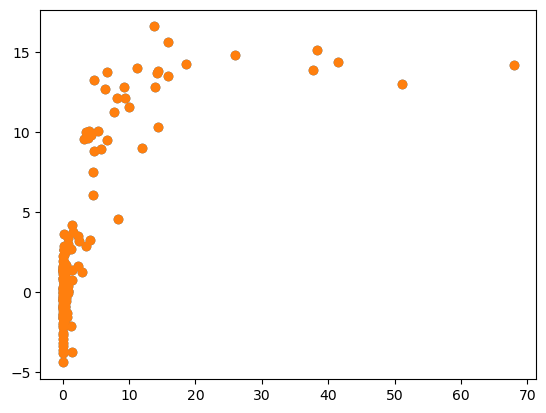

In [109]:
plot.scatter(y_test, predictions)
plot.show()

/var/folders/_v/3txnf2pd60nd0dfn_fv0_snc0000gn/T/ipykernel_8499/4282770944.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


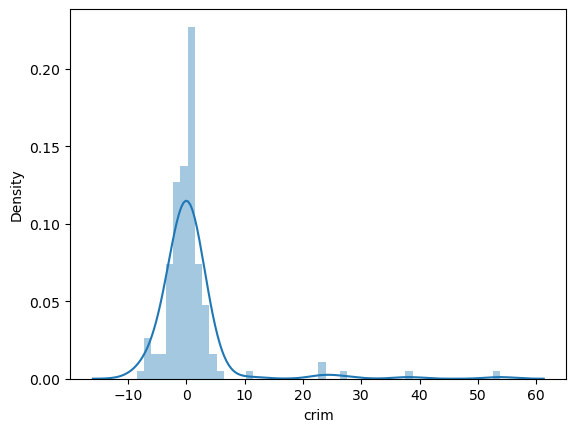

In [115]:
# Check the residuals
# sns.displot(y_test-predictions)
sns.distplot(y_test-predictions)
plot.show()

In [117]:
# The distribution will show you whether the model picked was best for your dataset in this case, the distribution is off therefore 
# LinearRegression was not the best choice

In [119]:
# Using the metrics of Mean Average Error, Mean Square Error, Root Mean Square Error
# Mean Average Error -> is the average of the error
# Mean Square Error -> is more popular since it punishes the larger errors. Tends to be useful in real world
# Root Mean Square Error ->  more popular than MSE since it interprets the y units

In [121]:
from sklearn import metrics

In [123]:
print('Mean Average Error', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Average Error 2.9023969755045145
Mean Square Error 47.19335814542856
Root Mean Square Error 6.869742218266167
